## Principal Component Analysis - PCA

In [2]:
#Import required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
#Lets import the dataset
df = pd.read_csv( filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',') 
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'] 

In [4]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.shape

(150, 5)

In [10]:
df.dtypes

sepal_len    float64
sepal_wid    float64
petal_len    float64
petal_wid    float64
class         object
dtype: object

In [6]:
#Checking for null records
df.isna().sum()
#df.isnull().values.any()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_len,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_wid,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_len,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_wid,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [14]:
#Separate the Target column that is the class column values in y array and rest of the values of the independent features in X array variables as below.
X = df.iloc[:,0:4].values 
y = df.iloc[:,4].values

In [18]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [21]:
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### 1. Standardization

In [23]:
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(X)
X_std[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### 2. Eigen decomposition — Computing Eigenvectors and Eigenvalues

### 2.1 Covariance Matrix

In [24]:
#mean_vec = np.mean(X_std, axis=0) 
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) 
#print('Covariance matrix \n%s' %cov_mat) 
print('Covariance matrix \n') 
cov_mat= np.cov(X_std, rowvar=False) 
cov_mat

Covariance matrix 



array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

### 2.2 Eigenvectors and Eigenvalues computation from the covariance matrix

In [25]:
cov_mat = np.cov(X_std.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) #Compute the eigenvalues and right eigenvectors of a square array.
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


### 2.3 Eigen Vectors verification

In [28]:
sq_eig=[] 
for i in eig_vecs: sq_eig.append(i**2) #Square the eigen vector
print(sq_eig) 
sum(sq_eig) 
print("")
print("sum of squares of each values in an eigen vector is \n", 0.27287211+ 0.13862096+0.51986524+ 0.06864169) 
for ev in eig_vecs: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))#Raises an AssertionError if two objects are not equal up to desired precision.

[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01]), array([0.31991586, 0.00427922, 0.40170422, 0.2741007 ])]

sum of squares of each values in an eigen vector is 
 1.0


### 3. Selecting The Principal Components

### 3.1 Sorting eigenvalues

In [30]:
#Make a list of (eigenvalue, eigenvector) tuples 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
for i in range(len(eig_vals))] 
print(type(eig_pairs)) 
#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.reverse() 
print("\n",eig_pairs) 
#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

<class 'list'>

 [(0.02074601399559622, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627])), (0.1483422264816398, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.9274036215173407, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (2.930353775589315, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))]



Eigenvalues in descending order:
0.02074601399559622
0.1483422264816398
0.9274036215173407
2.930353775589315


The Eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

### 3.2 Explained Variance

In [33]:
tot = sum(eig_vals) 
print("\n",tot) 
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) #Return the cumulative sum of the elements along a given axis.
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))


 4.026845637583892


1. Variance Explained
 [72.77045209380134, 23.030523267680632, 3.683831957627389, 0.5151926808906395]


2. Cumulative Variance Explained
 [ 72.77045209  95.80097536  99.48480732 100.        ]


3. Percentage of variance the first two principal components each contain
  [72.77045209380134, 23.030523267680632]


4. Percentage of variance the first two principal components together contain
 95.80097536148197


### 4. Construct the projection matrix W from the selected k eigenvectors

In [34]:
print(eig_pairs[0][1]) 
print(eig_pairs[1][1]) 
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))) #Stack arrays in sequence horizontally (column wise).
matrix_w

[ 0.26199559 -0.12413481 -0.80115427  0.52354627]
[-0.72101681  0.24203288  0.14089226  0.6338014 ]


array([[ 0.26199559, -0.72101681],
       [-0.12413481,  0.24203288],
       [-0.80115427,  0.14089226],
       [ 0.52354627,  0.6338014 ]])

### 5. Projection Onto the New Feature Space

In [35]:
Y = X_std.dot(matrix_w) 
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,0.023073,-0.121943
1,0.103208,-0.227251
2,0.027825,0.051480
3,-0.066311,0.098860
4,-0.037397,0.021428


In [36]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,species
0,0.023073,-0.121943,Iris-setosa
1,0.103208,-0.227251,Iris-setosa
2,0.027825,0.051480,Iris-setosa
3,-0.066311,0.098860,Iris-setosa
4,-0.037397,0.021428,Iris-setosa


### Visualize 2D Projection

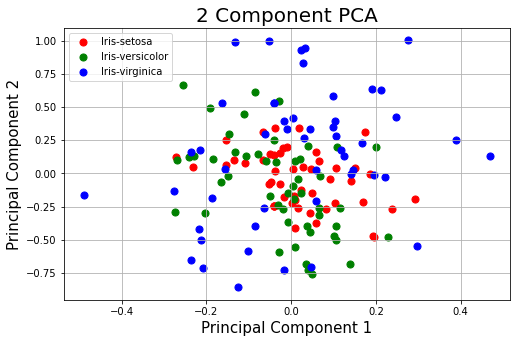

In [44]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['species'] == target  
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , 
               finalDf.loc[indicesToKeep, 'principal component 2'] , 
               c = color , s = 50) 
    ax.legend(targets) 
    ax.grid()

## Use of Python Libraries to directly compute Principal Components

In [45]:
#from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance. However we know from above computation that 2 components are enough so we have passed the 2 components.
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) # prints the top 5 rows

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [46]:
finalDf = pd.concat([principalDf, finalDf[['species']]], axis = 1) 
finalDf.head(5)

,principal component 1,principal component 2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
